# CS237 - Spring 2024 - Homework 04 - Programming Assignment
## Due Wednesday, February 14th at 09:00 PM in Gradescope

Submit your programming assignment by filling in this notebook with your solutions. Write all your code in this file, **be sure to click on Runtime-> Run all and verify that everything works as you intended**, and then upload the `ipynb` file to Gradescope.

### Notes:
* You can reuse code provided in this and previous homework descriptions.
* It is your obligation to make sure to go to "Runtime->Run All" and executed all cells before downloading the .ipynb file.
* Do your best to follow these principles:
 * **Correctness**: your code should be free of error. Debug it as many times as possible.
 * **Clarity**: write high-quality comments, functions, and variable naming
 * **Simplicity**: write your solution in the assigned cells, don't create new cells or reorder them.
 * **Completeness**: the solution to all problems must be included in one Python notebook, and no function should be blank.
 * **Authenticity**, since we assume that you posted your code written by you.


# Warm-up: Ploting step functions

The `matplotlib.pyplot.step( )` is a function that has a constant value along given intervals, with the values varying between intervals. The code below gives a simple usage of this function, needed to solve the rest of this programming assignmen.

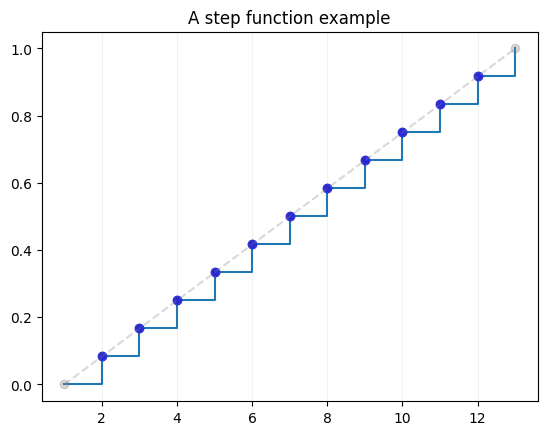

In [1]:
import operator

import matplotlib.pyplot as plt

x = [x for x in range(1,14)]
y = [y/36 for y in range(0,37,3)]

plt.step(x, y, where='post')
plt.plot(x[1:-1], y[1:-1], 'o', color='blue')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.95')
plt.title('A step function example')
plt.show()

# The Hat Check Problem

A hat check attendant places n hats into n boxes, with one hat per box. The people who own the hats arrive and select boxes at random. What is the probability that at least one person gets their own hat back? In this programming assignment, you will study this problem and compute a PDF and a CDF for this problem.

Implement the following Python function:
  - **hat_check(n)**: given a set of n randomly returned boxes, write a random function that counts the amount amount of boxes that returned to their original owner.

Note:
 * You can use the functions available at https://docs.python.org/3/library/random.html


In [2]:
# Implement your solution and run this cell

import matplotlib.pyplot as plt
import random

def hat_check(n):
    arr = []
    ret = 0
    for i in range(n):
        arr.append(i)
    random.shuffle(arr)
    for j in range(n):
        if arr[j] == j:
            ret += 1
    return ret
hat_check(10)

0

# The Hat Check Problem: Range, PDF and CDF

Let H be a random variable defined by `hat_check(10)`. Run the function `hat_check(10)` for at least 1000000 times and estimate:


a) The range of H as a sorted Python list

In [14]:
# Put your Python code here and run this cell
arr = []
for i in range(5000000):
    arr.append(hat_check(10))
arr.sort()
rng = list(set(arr))
print(rng)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 10]


Note:  this must be the *observed* range we actually see after running hat_check(10) multiple times.

b) The PDF of H

[0.367738, 0.1841888, 0.0613496, 0.0153622, 0.0030588, 0.000517, 6.48e-05, 1.22e-05, 0.0, 2e-07]


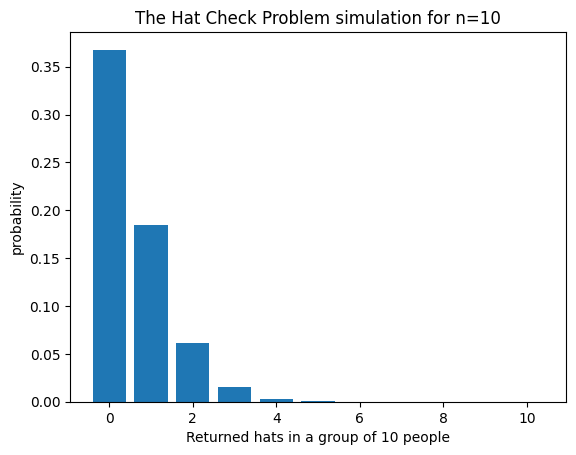

In [20]:
# Put your Python code here and run this cell
prob = []
for i in range(rng[len(rng)-1]):
    prob.append(arr.count(i+1)/5000000)
    
print(prob)

k=rng
probability = prob
plt.bar(k, probability)
plt.title('The Hat Check Problem simulation for n=10')
plt.xlabel("Returned hats in a group of 10 people")
plt.ylabel("probability")
plt.show()


c) The CDF of H

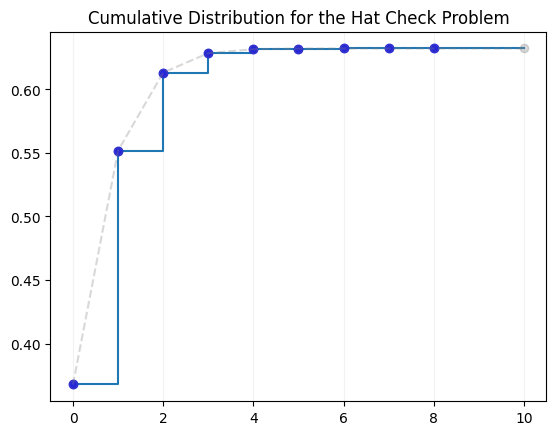

In [21]:
# Put your Python code here and run this cell
cumulative_probability = []
cumulative_probability.append(prob[0])
for i in range(1, len(prob)):
    cumulative_probability.append(prob[i]+cumulative_probability[i-1])
        

plt.step(k, cumulative_probability, where='post')
plt.plot(k[:-1], cumulative_probability[:-1], 'o', color='blue')
plt.plot(k, cumulative_probability, 'o--', color='grey', alpha=0.3)
plt.grid(axis='x', color='0.95')
plt.title('Cumulative Distribution for the Hat Check Problem')
plt.show()